In [1]:
# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Add CSV
df = pd.read_csv("../Resources/mental_health_and_technology_usage_2024.csv")
df

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,45,Male,8.80,7.81,4.08,8.03,Excellent,Low,7.22,2.00,No,Negative,No
1,USER-00002,34,Female,6.46,3.64,2.34,8.86,Poor,High,6.15,9.60,No,Neutral,Yes
2,USER-00003,64,Female,6.45,5.52,0.29,13.08,Excellent,Medium,8.91,4.39,Yes,Positive,Yes
3,USER-00004,31,Male,10.64,2.06,2.75,11.50,Poor,Medium,4.00,5.05,Yes,Positive,No
4,USER-00005,52,Female,6.93,3.78,1.16,13.85,Good,Low,4.14,9.55,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,USER-09996,28,Female,4.72,2.71,4.91,6.62,Good,Medium,6.15,0.74,No,Negative,No
9996,USER-09997,48,Male,1.38,6.32,3.01,6.29,Good,High,4.47,7.72,Yes,Positive,No
9997,USER-09998,35,Male,10.79,1.48,2.88,3.04,Fair,Medium,6.67,5.52,Yes,Neutral,Yes
9998,USER-09999,49,Female,8.96,4.66,4.39,2.49,Poor,Medium,4.42,0.81,No,Positive,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

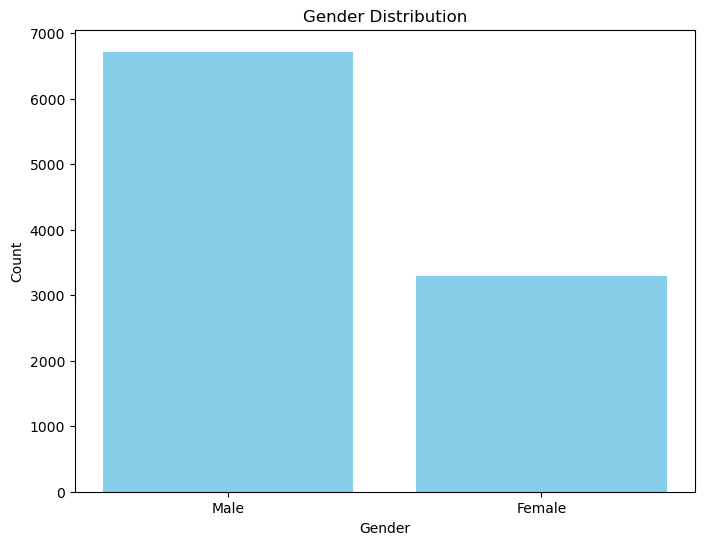

In [4]:
# Gender Count Bar Plot
df_bar = df["Gender"].value_counts()
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
plt.bar(df_bar.index, df_bar.values, color='skyblue')  # Added color for visual appeal
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

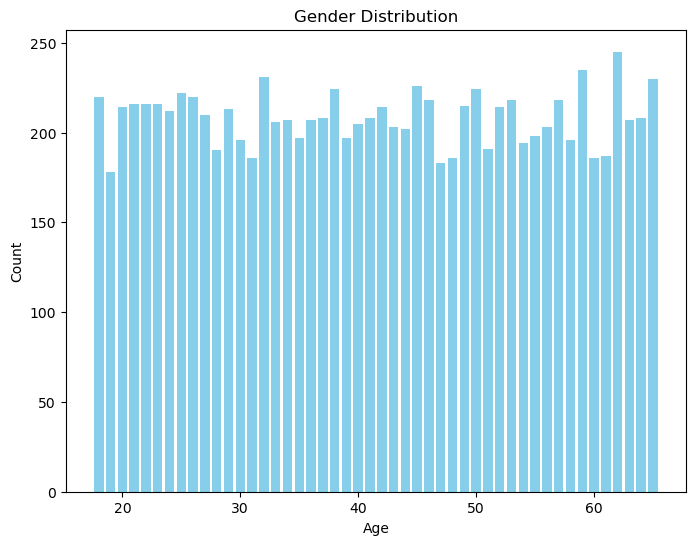

In [5]:
# Gender Count Bar Plot
df_bar = df["Age"].value_counts()
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
plt.bar(df_bar.index, df_bar.values, color='skyblue')  # Added color for visual appeal
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

Correlation Matrix:
                              Gaming_Hours  Mental_Health_Status_Numeric  \
Gaming_Hours                      1.000000                     -0.006302   
Mental_Health_Status_Numeric     -0.006302                      1.000000   
Stress_Level_Numeric             -0.001478                     -0.012818   

                              Stress_Level_Numeric  
Gaming_Hours                             -0.001478  
Mental_Health_Status_Numeric             -0.012818  
Stress_Level_Numeric                      1.000000  


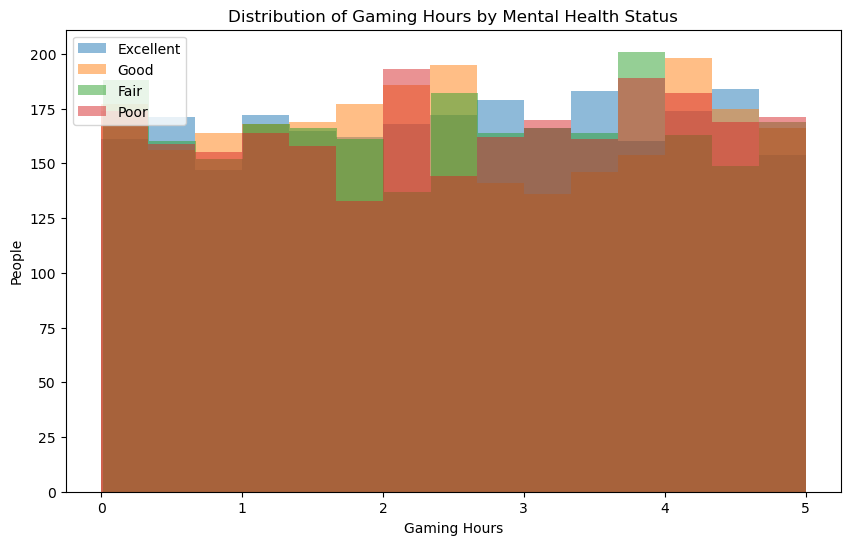

<Figure size 1000x600 with 0 Axes>

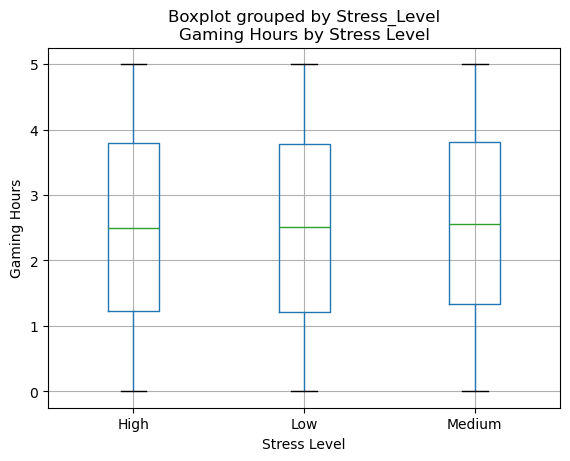

Statistical Summary of Gaming Hours by Mental Health Status:
                       count      mean       std   min    25%   50%   75%  max
Mental_Health_Status                                                          
Excellent             2518.0  2.520866  1.432996  0.00  1.290  2.55  3.76  5.0
Fair                  2490.0  2.508378  1.448691  0.01  1.240  2.55  3.78  5.0
Good                  2508.0  2.490925  1.452172  0.00  1.245  2.43  3.81  5.0
Poor                  2484.0  2.542407  1.453558  0.00  1.270  2.57  3.81  5.0


In [6]:
# Convert categorical columns to numeric for correlation analysis
mental_health_mapping = {'Excellent': 3, 'Good': 2, 'Fair': 1, 'Poor': 0}
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

df['Mental_Health_Status_Numeric'] = df['Mental_Health_Status'].map(mental_health_mapping)
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_mapping)

# Correlation analysis
correlation = df[['Gaming_Hours', 'Mental_Health_Status_Numeric', 'Stress_Level_Numeric']].corr()
print("Correlation Matrix:")
print(correlation)

# Visualizations
plt.figure(figsize=(10, 6))
plt.hist(df[df['Mental_Health_Status'] == 'Excellent']['Gaming_Hours'], bins=15, alpha=0.5, label='Excellent')
plt.hist(df[df['Mental_Health_Status'] == 'Good']['Gaming_Hours'], bins=15, alpha=0.5, label='Good')
plt.hist(df[df['Mental_Health_Status'] == 'Fair']['Gaming_Hours'], bins=15, alpha=0.5, label='Fair')
plt.hist(df[df['Mental_Health_Status'] == 'Poor']['Gaming_Hours'], bins=15, alpha=0.5, label='Poor')
plt.title('Distribution of Gaming Hours by Mental Health Status')
plt.xlabel('Gaming Hours')
plt.ylabel('People')
plt.legend()
plt.show()

# Box plot for Gaming Hours vs Stress Level
plt.figure(figsize=(10, 6))
df.boxplot(column='Gaming_Hours', by='Stress_Level')
plt.title('Gaming Hours by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Gaming Hours')
plt.show()

# Statistical summary of gaming hours by mental health status
summary = df.groupby('Mental_Health_Status')['Gaming_Hours'].describe()
print("Statistical Summary of Gaming Hours by Mental Health Status:")
print(summary)

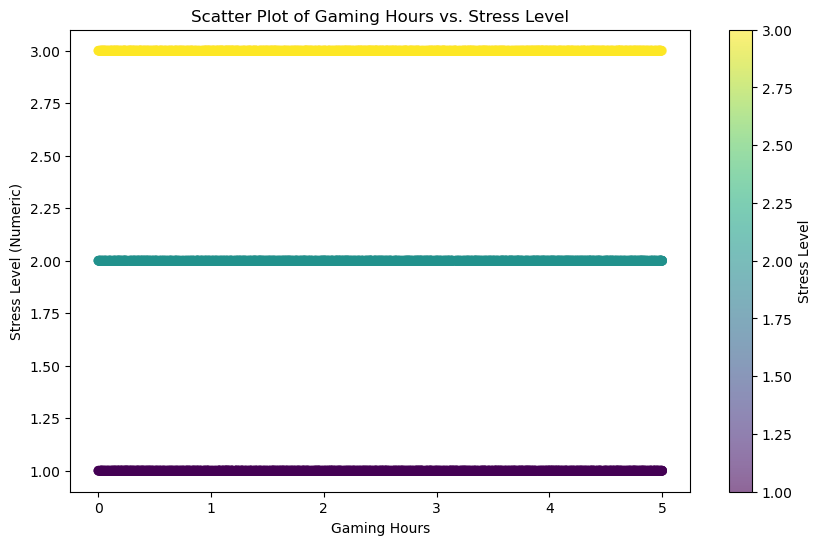

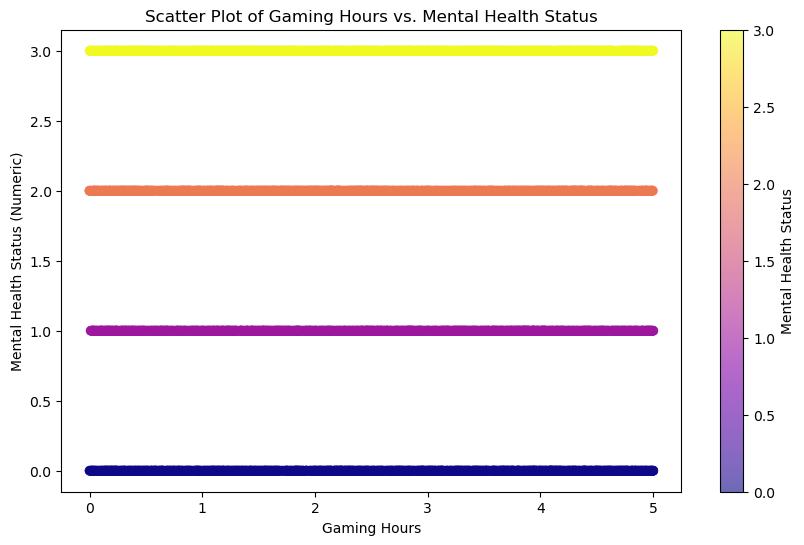

In [7]:
# Scatter plot for Gaming Hours vs Stress Level (numeric)
plt.figure(figsize=(10, 6))
plt.scatter(df['Gaming_Hours'], df['Stress_Level_Numeric'], alpha=0.6, c=df['Stress_Level_Numeric'], cmap='viridis')
plt.title('Scatter Plot of Gaming Hours vs. Stress Level')
plt.xlabel('Gaming Hours')
plt.ylabel('Stress Level (Numeric)')
plt.colorbar(label='Stress Level')
plt.show()

# Optional: Scatter plot for Gaming Hours vs Mental Health Status
plt.figure(figsize=(10, 6))
plt.scatter(df['Gaming_Hours'], df['Mental_Health_Status_Numeric'], alpha=0.6, c=df['Mental_Health_Status_Numeric'], cmap='plasma')
plt.title('Scatter Plot of Gaming Hours vs. Mental Health Status')
plt.xlabel('Gaming Hours')
plt.ylabel('Mental Health Status (Numeric)')
plt.colorbar(label='Mental Health Status')
plt.show()

Average Gaming Hours, Stress Level, and Mental Health Status by Gender:
        Gaming_Hours  Stress_Level_Numeric  Mental_Health_Status_Numeric
Gender                                                                  
Female      2.536738              2.008825                      1.510651
Male        2.505252              1.995383                      1.503724


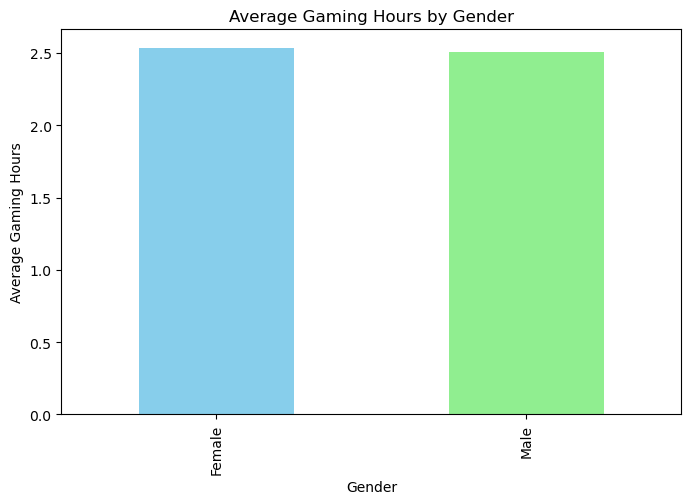

<Figure size 1000x600 with 0 Axes>

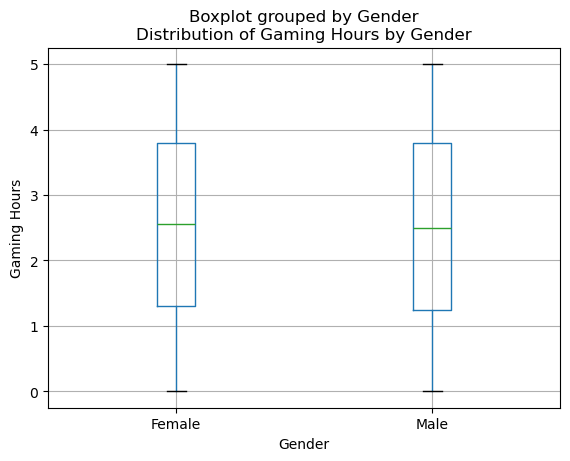

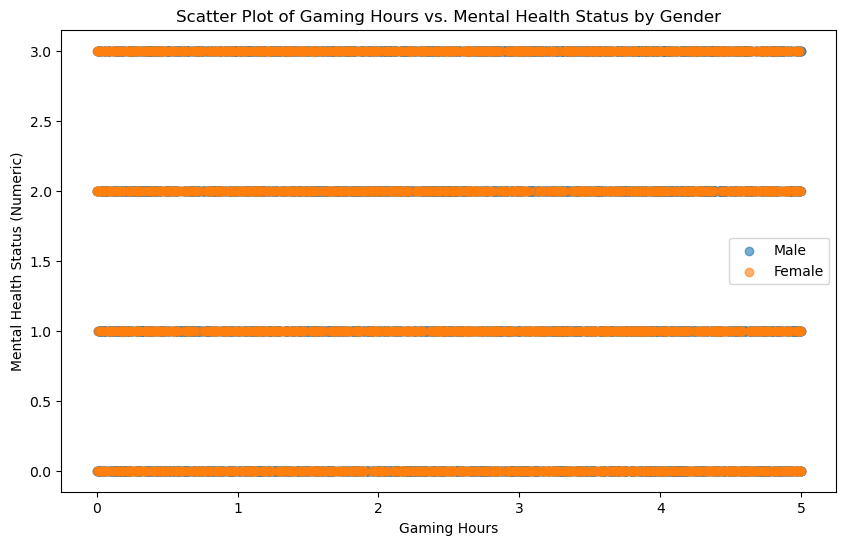

In [8]:
# Group data by Gender and calculate average gaming hours and stress levels
gender_summary = df.groupby('Gender')[['Gaming_Hours', 'Stress_Level_Numeric', 'Mental_Health_Status_Numeric']].mean()
print("Average Gaming Hours, Stress Level, and Mental Health Status by Gender:")
print(gender_summary)

# Visualization: Average gaming hours by gender
plt.figure(figsize=(8, 5))
gender_summary['Gaming_Hours'].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Gaming Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Gaming Hours')
plt.show()

# Box plot for gaming hours by gender
plt.figure(figsize=(10, 6))
df.boxplot(column='Gaming_Hours', by='Gender')
plt.title('Distribution of Gaming Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Gaming Hours')
plt.show()

# Scatter plot for Gaming Hours vs. Mental Health Status by Gender
plt.figure(figsize=(10, 6))
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Gaming_Hours'], subset['Mental_Health_Status_Numeric'], alpha=0.6, label=gender)

plt.title('Scatter Plot of Gaming Hours vs. Mental Health Status by Gender')
plt.xlabel('Gaming Hours')
plt.ylabel('Mental Health Status (Numeric)')
plt.legend()
plt.show()


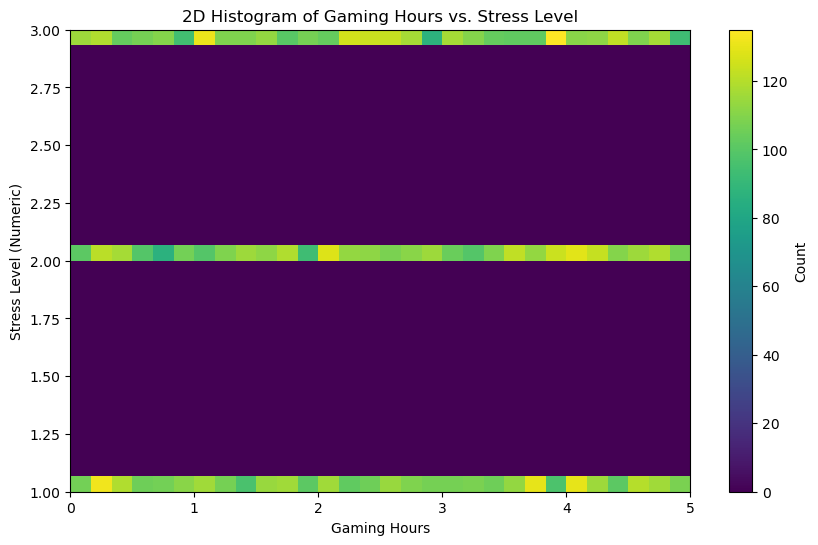

In [9]:
# 2D Histogram for Gaming Hours vs Stress Level
plt.figure(figsize=(10, 6))
plt.hist2d(df['Gaming_Hours'], df['Stress_Level_Numeric'], bins=30, cmap='viridis')
plt.title('2D Histogram of Gaming Hours vs. Stress Level')
plt.xlabel('Gaming Hours')
plt.ylabel('Stress Level (Numeric)')
plt.colorbar(label='Count')
plt.show()

Average Gaming Hours by Gender:
Gender
Female    2.536738
Male      2.505252
Name: Gaming_Hours, dtype: float64


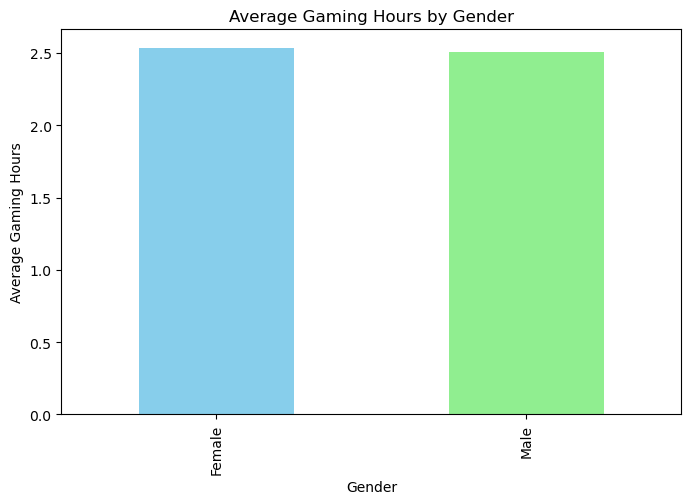

<Figure size 1000x600 with 0 Axes>

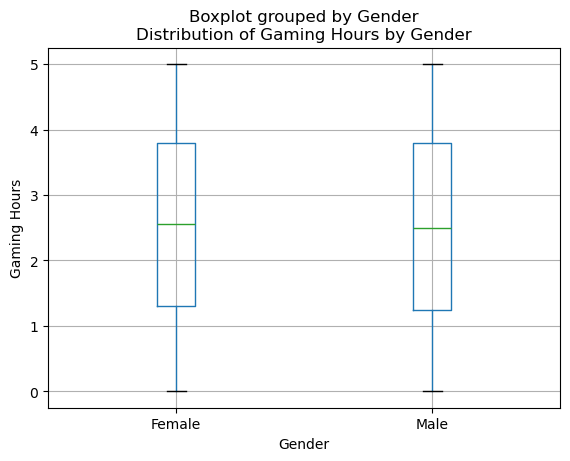

In [10]:
# Group data by Gender and calculate average gaming hours
gender_gaming_hours = df.groupby('Gender')['Gaming_Hours'].mean()
print("Average Gaming Hours by Gender:")
print(gender_gaming_hours)

# Bar chart for average gaming hours by gender
plt.figure(figsize=(8, 5))
gender_gaming_hours.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Gaming Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Gaming Hours')
plt.show()

# Box plot for gaming hours by gender to show distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='Gaming_Hours', by='Gender')
plt.title('Distribution of Gaming Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Gaming Hours')
plt.show()


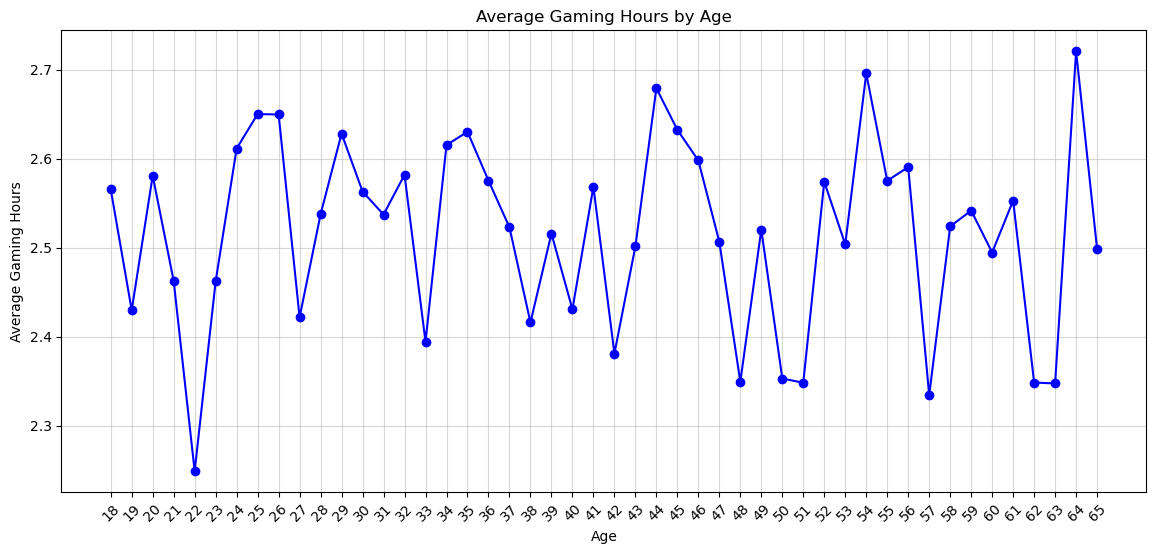

In [11]:
# Group data by Age and calculate average gaming hours
age_gaming_hours = df.groupby('Age')['Gaming_Hours'].mean().sort_index()

# Plotting the line plot for average gaming hours by age
plt.figure(figsize=(14, 6))
plt.plot(age_gaming_hours.index, age_gaming_hours.values, marker='o', linestyle='-', color='b')
plt.title('Average Gaming Hours by Age')
plt.xlabel('Age')
plt.ylabel('Average Gaming Hours')
plt.grid(True, alpha=.5)
plt.xticks(age_gaming_hours.index, rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

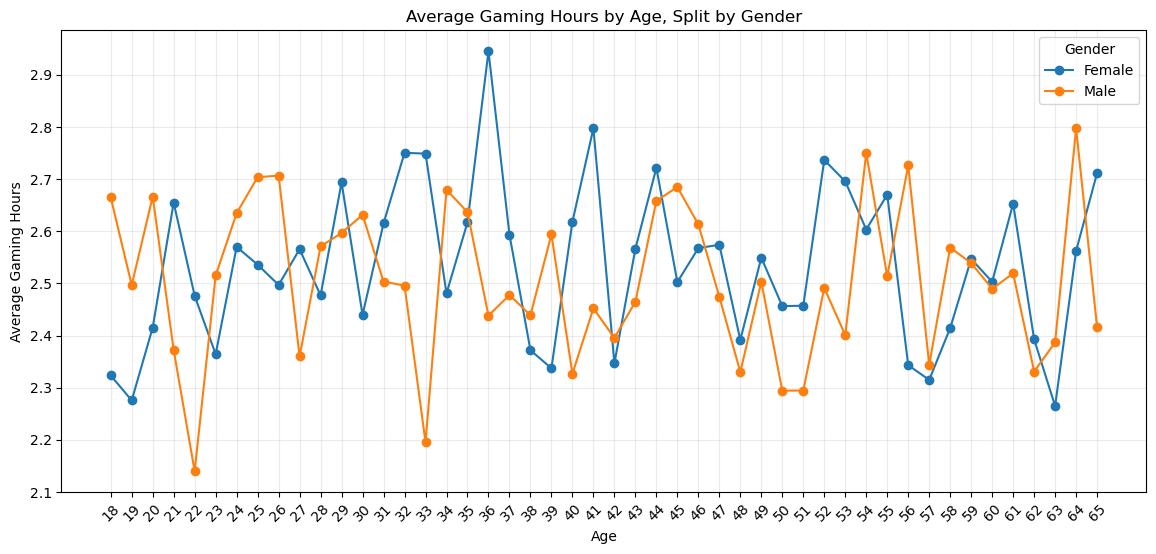

In [12]:
# Group data by Age and Gender and calculate average gaming hours
age_gender_gaming_hours = df.groupby(['Age', 'Gender'])['Gaming_Hours'].mean().unstack()

# Plotting the line plot for average gaming hours by age, split by gender
plt.figure(figsize=(14, 6))
for gender in age_gender_gaming_hours.columns:
    plt.plot(age_gender_gaming_hours.index, age_gender_gaming_hours[gender], marker='o', linestyle='-', label=gender)

plt.title('Average Gaming Hours by Age, Split by Gender')
plt.xlabel('Age')
plt.ylabel('Average Gaming Hours')
plt.grid(True, alpha=.25)
plt.xticks(age_gender_gaming_hours.index, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Gender')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4836\13941380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_gaming_hours = df.groupby(['Age_Group', 'Gender'])['Gaming_Hours'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

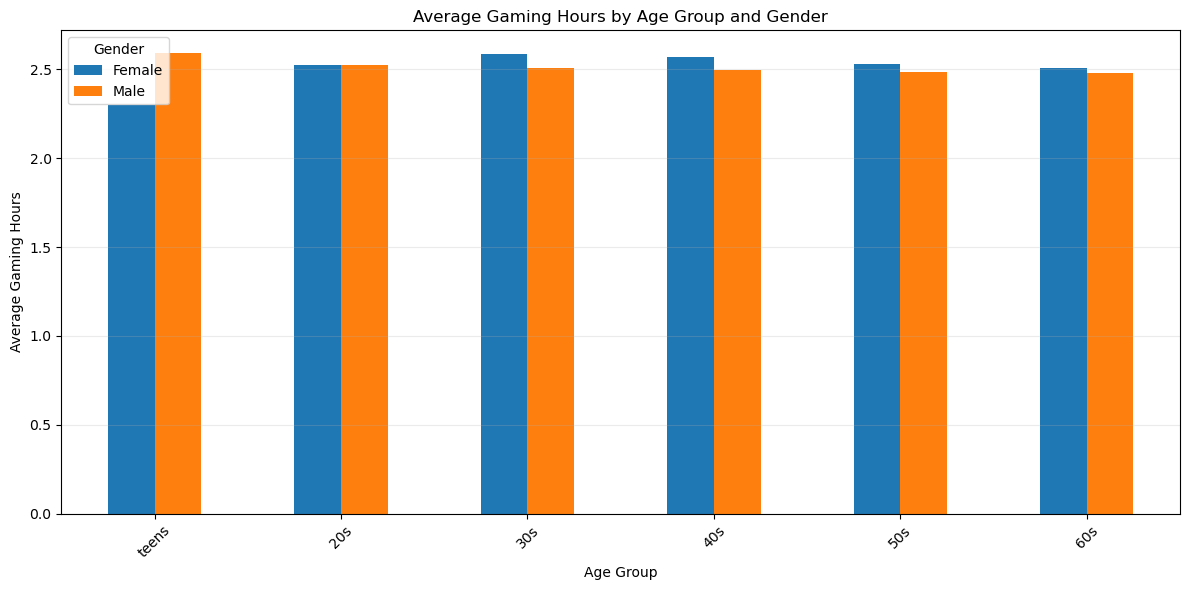

In [13]:
# Create a new column for age groups by decade
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 19, 29, 39, 49, 59, 69], 
                         labels=['teens', '20s', '30s', '40s', '50s', '60s'])

# Group data by Age Group and Gender and calculate average gaming hours
age_group_gaming_hours = df.groupby(['Age_Group', 'Gender'])['Gaming_Hours'].mean().unstack()

# Plotting the average gaming hours by age group, split by gender
plt.figure(figsize=(12, 6))
age_group_gaming_hours.plot(kind='bar', figsize=(12, 6))
plt.title('Average Gaming Hours by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Gaming Hours')
plt.grid(axis='y', alpha=.25)
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels properly
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4836\2218437154.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mental_health = df.groupby(['Age_Group', 'Gender'])['Mental_Health_Status_Numeric'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

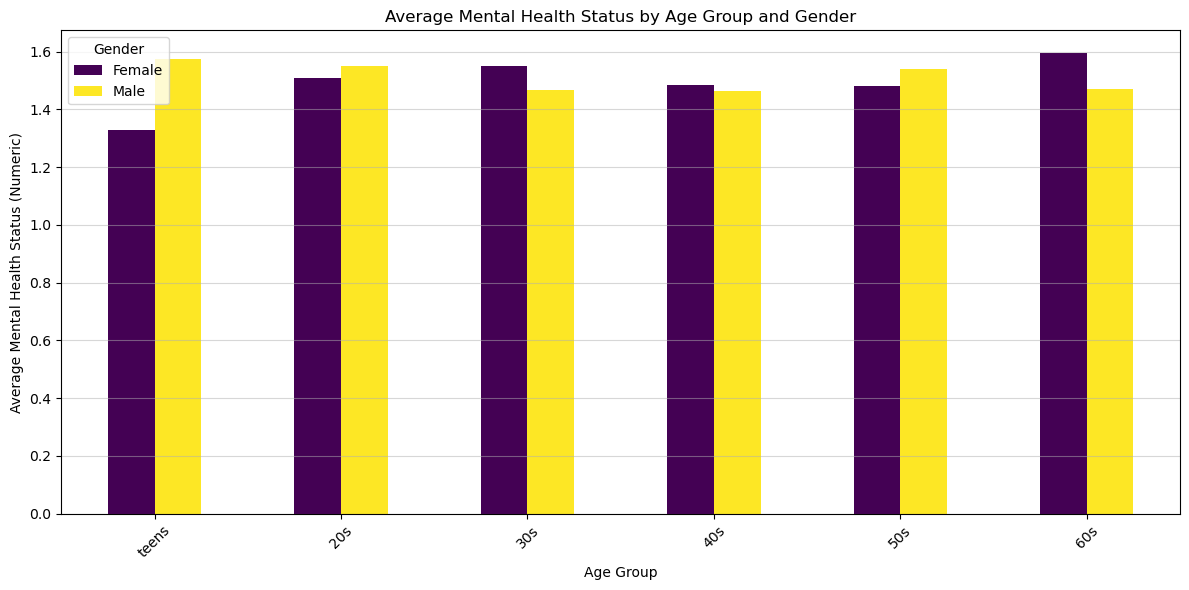

In [14]:
# Create a new column for age groups by decade if not already created
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 19, 29, 39, 49, 59, 69], 
                         labels=['teens', '20s', '30s', '40s', '50s', '60s'])

# Group data by Age Group and Gender and calculate average mental health status
age_group_mental_health = df.groupby(['Age_Group', 'Gender'])['Mental_Health_Status_Numeric'].mean().unstack()

# Plotting the average mental health status by age group, split by gender
plt.figure(figsize=(12, 6))
age_group_mental_health.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average Mental Health Status by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Mental Health Status (Numeric)')
plt.grid(axis='y', alpha=.5)
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels properly
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4836\1788442817.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stress = df.groupby(['Age_Group', 'Gender'])['Stress_Level_Numeric'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

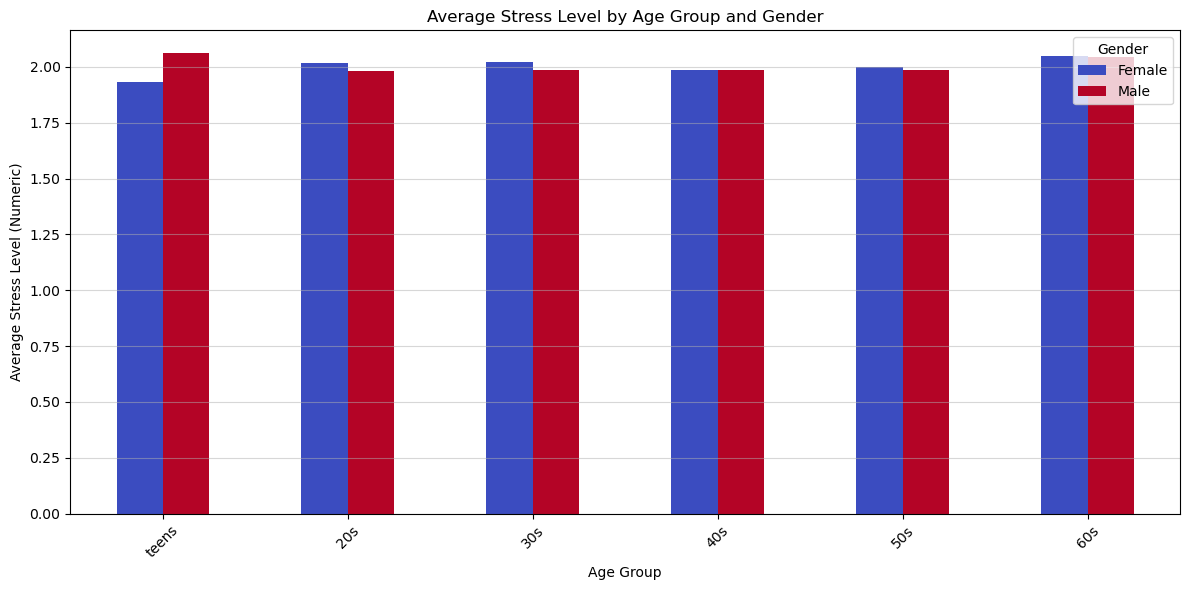

In [15]:
# Map the 'Stress_Level' column to numeric values for analysis
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_mapping)

# Group data by Age Group and Gender and calculate average stress level
age_group_stress = df.groupby(['Age_Group', 'Gender'])['Stress_Level_Numeric'].mean().unstack()

# Plotting the average stress level by age group, split by gender
plt.figure(figsize=(12, 6))
age_group_stress.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Average Stress Level by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Stress Level (Numeric)')
plt.grid(axis='y', alpha=.5)
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels properly
plt.show()


<Figure size 1400x700 with 0 Axes>

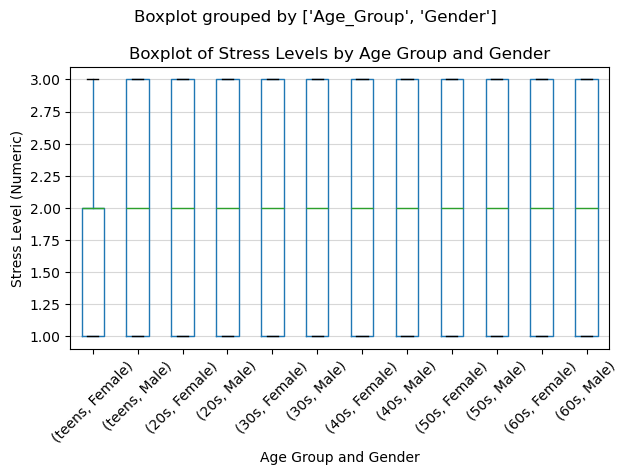

<Figure size 1400x700 with 0 Axes>

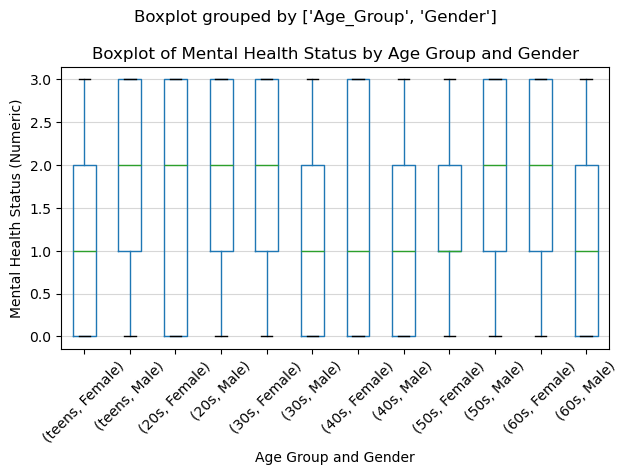

In [16]:
# Boxplot for stress level by age group and gender
plt.figure(figsize=(14, 7))
df.boxplot(column='Stress_Level_Numeric', by=['Age_Group', 'Gender'], grid=False)
plt.title('Boxplot of Stress Levels by Age Group and Gender')
plt.xlabel('Age Group and Gender')
plt.ylabel('Stress Level (Numeric)')
plt.grid(axis='y', alpha=.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot for mental health status by age group and gender
plt.figure(figsize=(14, 7))
df['Mental_Health_Status_Numeric'] = df['Mental_Health_Status'].map({'Excellent': 3, 'Good': 2, 'Fair': 1, 'Poor': 0})
df.boxplot(column='Mental_Health_Status_Numeric', by=['Age_Group', 'Gender'], grid=False)
plt.title('Boxplot of Mental Health Status by Age Group and Gender')
plt.xlabel('Age Group and Gender')
plt.ylabel('Mental Health Status (Numeric)')
plt.grid(axis='y', alpha=.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
